In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import investpy as inv
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = (20,10)

%matplotlib inline

In [2]:
BC = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.4391/dados?formato=json'

In [45]:
BOVA = inv.get_etf_historical_data("Ishares Ibovespa", country='Brazil', from_date='01/01/1900', to_date ='09/05/2022')#['Close']
#BOVA/=35.31

<AxesSubplot:xlabel='Date'>

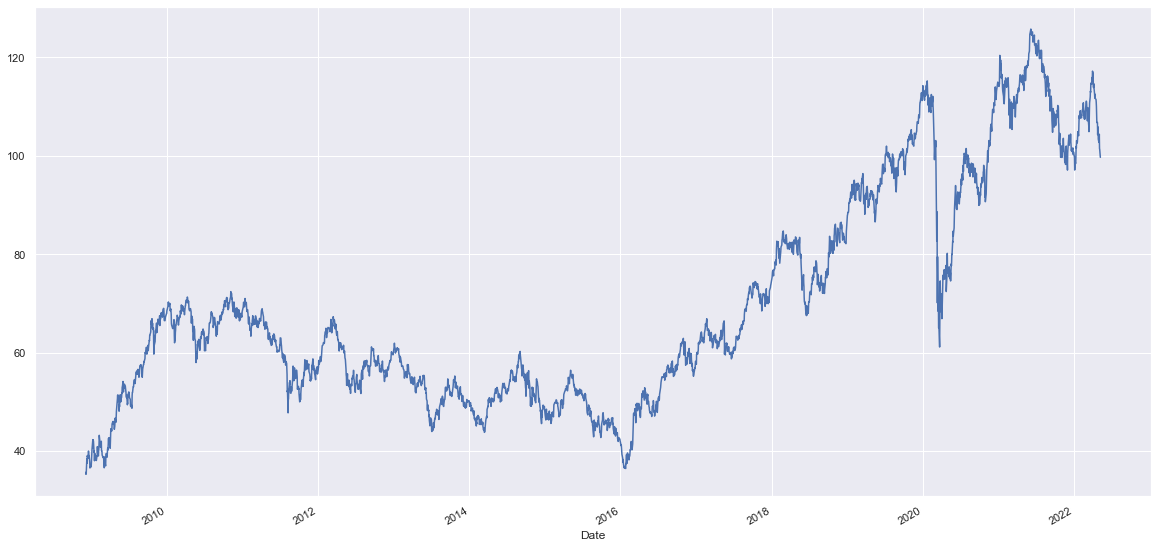

In [46]:
plt.figure(figsize=(20,10))
BOVA["Close"].plot()

In [73]:
BOVA.tail(26)

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2022-03-31,115.91,116.45,115.57,115.60,4824650,BRL,BM&FBovespa
2022-04-01,116.58,117.22,116.56,117.20,5894874,BRL,BM&FBovespa
2022-04-04,116.85,117.06,116.28,116.80,2214533,BRL,BM&FBovespa
2022-04-05,116.71,117.10,114.38,114.51,7418366,BRL,BM&FBovespa
2022-04-06,114.12,114.31,112.48,113.87,8635815,BRL,BM&FBovespa
2022-04-07,113.27,114.90,113.01,114.65,4445856,BRL,BM&FBovespa
2022-04-08,113.95,114.49,113.12,113.98,3838833,BRL,BM&FBovespa
2022-04-11,112.85,113.37,112.50,112.57,3491911,BRL,BM&FBovespa
2022-04-12,113.97,114.18,111.77,111.77,3771220,BRL,BM&FBovespa


In [81]:
retAbril=((BOVA.loc["2022-05-02"][3]/BOVA.loc["2022-04-01"][3])-1).round(2)
retAbril

-0.12

In [49]:
cdi = pd.read_json(BC)
cdi = cdi[cdi.index >=273]
#cdi.index -= 272
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
cdi.set_index('data', inplace=True)
cdi=cdi[:-1]
cdi

,valor
data,
2008-12-01,1.11
2009-01-01,1.04
2009-02-01,0.85
2009-03-01,0.97
2009-04-01,0.84
...,...
2021-12-01,0.77
2022-01-01,0.73
2022-02-01,0.76


<AxesSubplot:xlabel='data'>

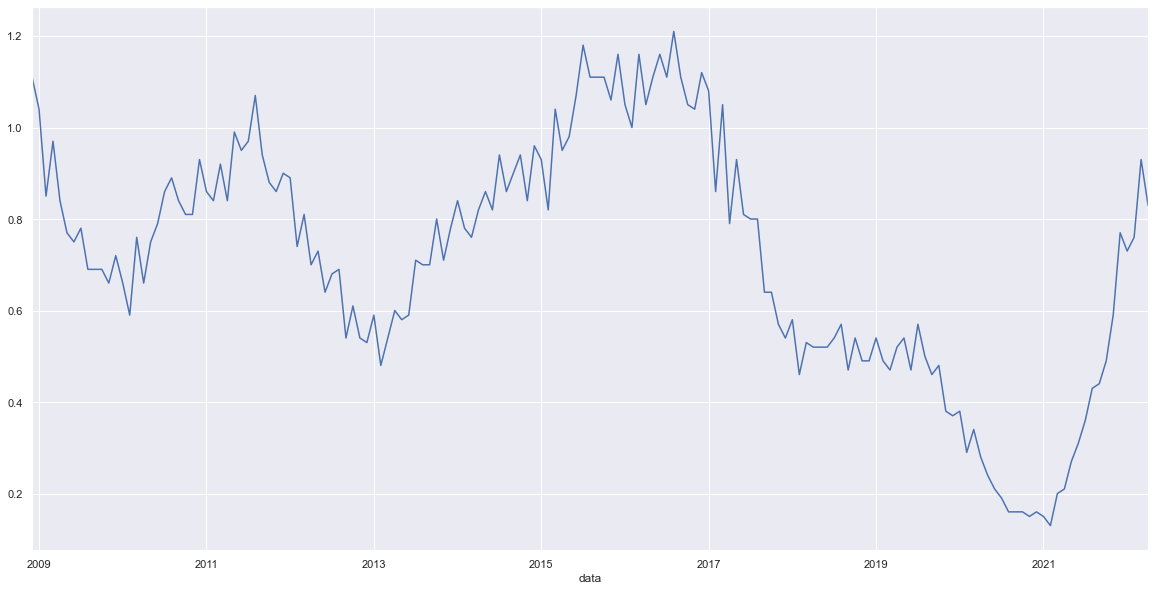

In [50]:
plt.figure(figsize=(20,10))
cdi["valor"].plot()

In [51]:
from datetime import date
hoje = date.today().strftime('%Y-%m-%d')
hoje

'2022-05-09'

In [84]:
y=pd.concat([BOVA, cdi], axis=1)
y= y.bfill()
cdiBOVA=pd.merge(y, cdi, left_index=True, right_index=True)
#print(len(cdiBOVA))
cdiBOVA#=cdiBOVA(["Close","valor_x"])
cdiBOVA.iloc[0,3] = cdiBOVA.iloc[0,0] 
#cdiBOVA
#cdiBOVA = cdiBOVA.drop(["High","Low",], axis=1) 
cdiBOVA["retBOVA"] = cdiBOVA["Close"].pct_change().round(2)
cdiBOVA["retBOVA"] = cdiBOVA["retBOVA"].shift(-1)
cdiBOVA["CDI"] = cdiBOVA["valor_x"]/100
cdiBOVA = pd.DataFrame(cdiBOVA, columns = ['CDI','retBOVA'])
cdiBOVA.iloc[-1,-1] = retAbril
cdiBOVA

,CDI,retBOVA
2008-12-01,0.0111,0.16
2009-01-01,0.0104,-0.03
2009-02-01,0.0085,-0.06
2009-03-01,0.0097,0.15
2009-04-01,0.0084,0.19
...,...,...
2021-12-01,0.0077,0.03
2022-01-01,0.0073,0.09
2022-02-01,0.0076,0.02
2022-03-01,0.0093,0.05


In [90]:
(1000000*(cdiBOVA.iloc[0,0]+1)).round(2)

1011100.0

In [125]:
initC=50000
initB=50000

etf=[]

for c,b in zip (cdiBOVA["CDI"],cdiBOVA["retBOVA"]):
    initC=initC*(1+c)
    initB=initB*(1+b)
    aux = initC+initB
    initC = aux/2
    initB = aux/2
    etf.append((aux/1000)-100)
    #print(aux)
x=round((aux/1000)-100,3)
x

237.295

Returno total:  237.295 %


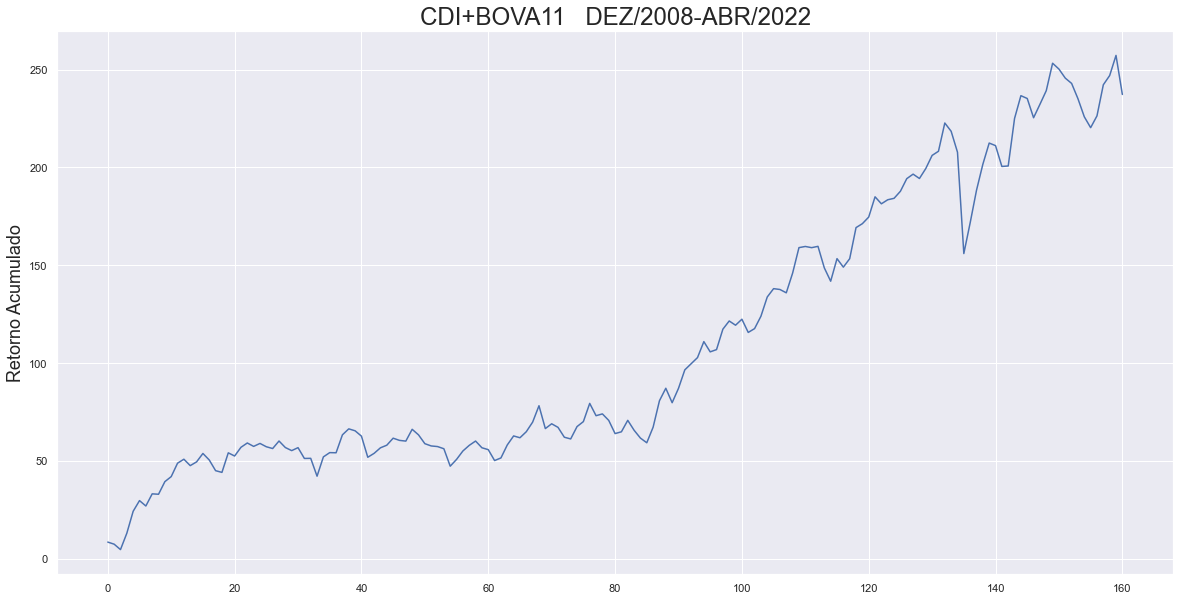

In [129]:

print("Returno total: ",x,"%")
plt.figure(figsize=(20,10))
plt.plot(etf)
plt.title('CDI+BOVA11   DEZ/2008-ABR/2022', fontsize='24')
plt.ylabel('Retorno Acumulado', fontsize='18')
plt.show;

In [ ]:
bov= pd.DataFrame
bova1 = 34.73
data="2009-01-02"
BOVA[BOVA.index==data]



#while data < hoje:
#    d
#    x=1+1
    

In [ ]:
data[5:6]

In [39]:
data < hoje

True

In [ ]:
revInt = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.13621/dados?formato=json'
resInt = pd.read_json(revInt)

In [ ]:
resInt.plot()

In [ ]:
import yfinance as yf